Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [1]:
# cell for imports. All imports must go here.
!pip install pandas
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [2]:
# Opening and writing a file to a variable
titanic = pd.read_csv('train.csv')
print("Information about each column:")
print(titanic.info())

print("\nThe first few lines of the dataframe:")
print(titanic.head(4))

Information about each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

The first few lines of the dataframe:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1 

# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

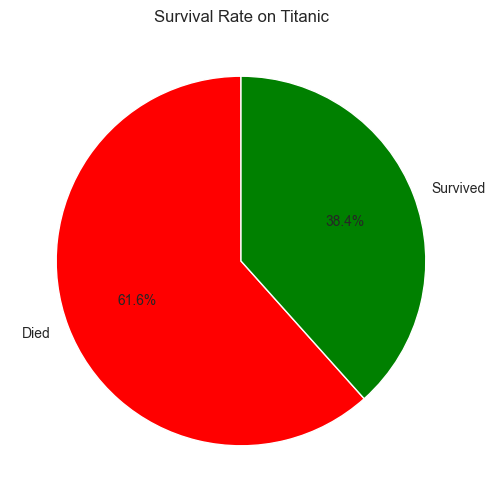

In [3]:
survived_counts = titanic['Survived'].value_counts()

# Creating a chart
plt.figure(figsize=(8, 6))
plt.pie(survived_counts, labels=['Died', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Survival Rate on Titanic')
plt.show()


* Створена кругова діаграма, що демонструє кількість загиблих 61,6% та кількість живих 38,4%. в Сумі 100%, і початок із 12-ї години.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


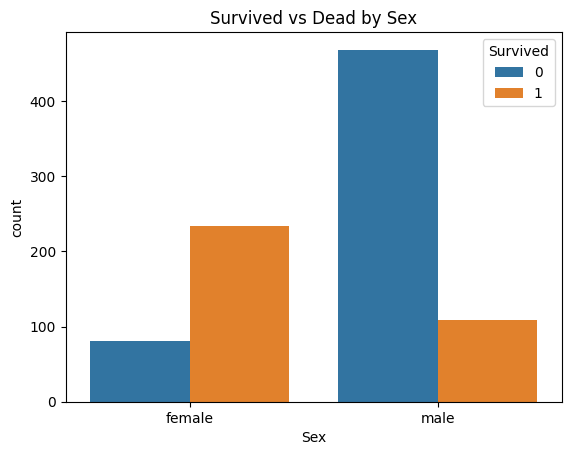

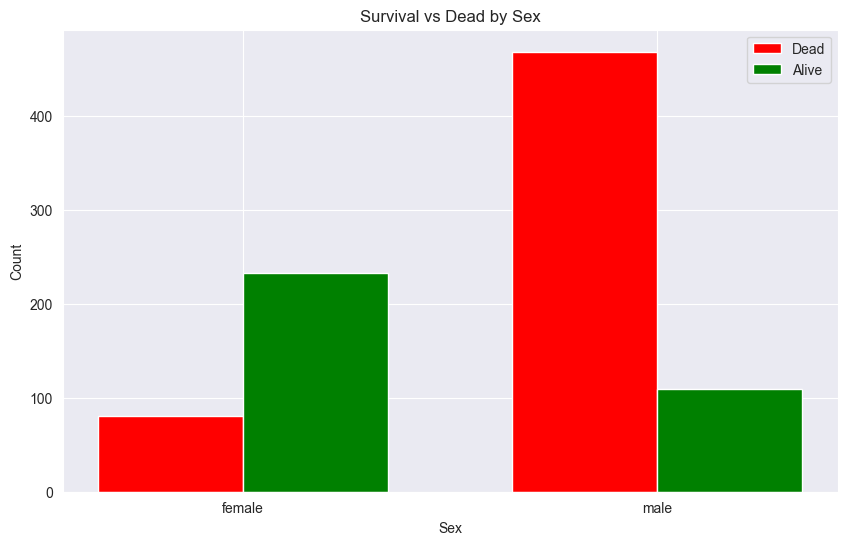

In [4]:
# We group the data by sex and calculate the number of survivors and dead
survival_by_sex = titanic.groupby(['Sex', 'Survived'], as_index=False).size()

# We divide the data into separate frames for the dead and survivors
dead = survival_by_sex[survival_by_sex['Survived'] == 0]
alive = survival_by_sex[survival_by_sex['Survived'] == 1]

# Building a bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(dead['Sex']))
plt.bar(index, dead['size'], bar_width, color='red', label='Dead')
plt.bar([i + bar_width for i in index], alive['size'], bar_width, color='green', label='Alive')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival vs Dead by Sex')
plt.xticks([i + bar_width / 2 for i in index], dead['Sex'])
plt.legend()plt.show()

* Спочаткру погрупував данні за статю та живий/мертвий, використовуючи метод "groupby". Потім профільтрував отримані данні, і отримати статистику для живих та метрвих. І в кінці будую "bar chart", де кольором відділені живі та мертві за статтю.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

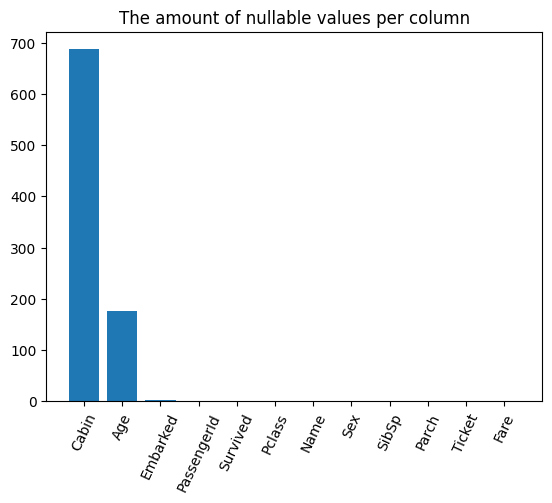

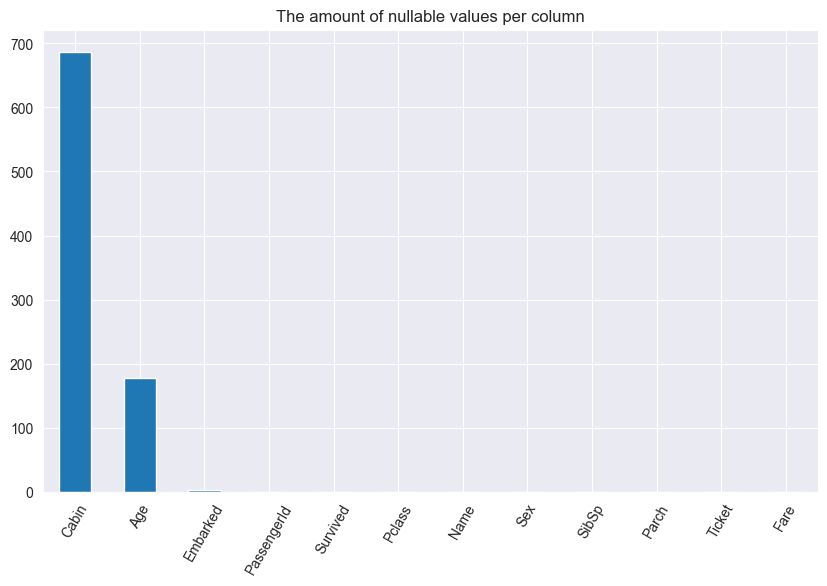

In [5]:
# We get the number of missing values for each variable
missing_values = titanic.isnull().sum()

# We sort the values in descending order
missing_values = missing_values.sort_values(ascending=False)


plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('The amount of nullable values per column')
plt.xticks(rotation=60)
plt.show()

* Отримую кількість пропущених значень в кожній змінні, сортую за спаданням, використовуючи метод "sort_values()", і потім будую гістограму.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

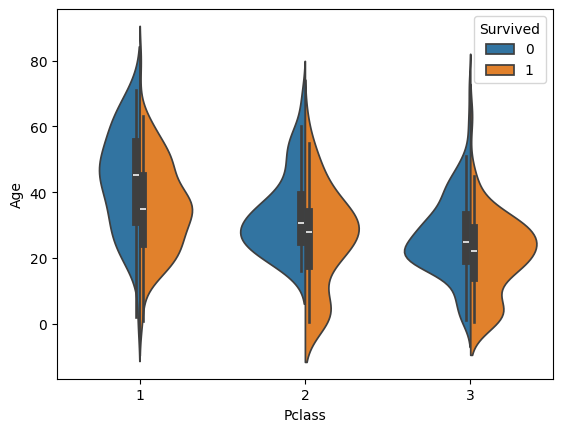

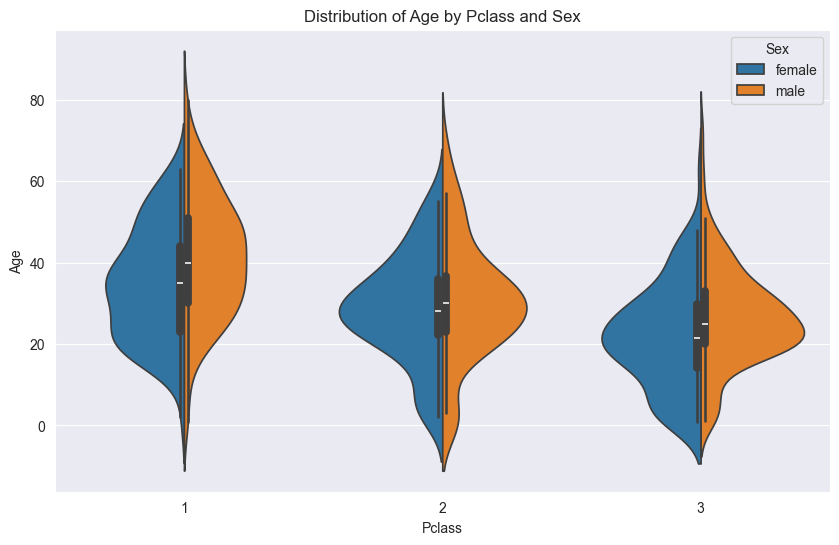

In [6]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=titanic, x='Pclass', y='Age', hue='Sex', split=True)

plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('Distribution of Age by Pclass and Sex')
plt.show()

* Тут я вже використав бібліотеку "seaborn", та її метод "violinplot()". Тут зображений віковий розподіл пасажирів за типом їх класу та статі. Для кожного знайдена медіана та квартилі. 

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


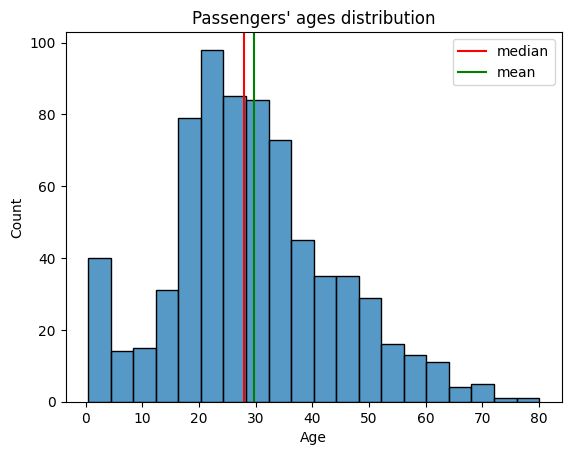

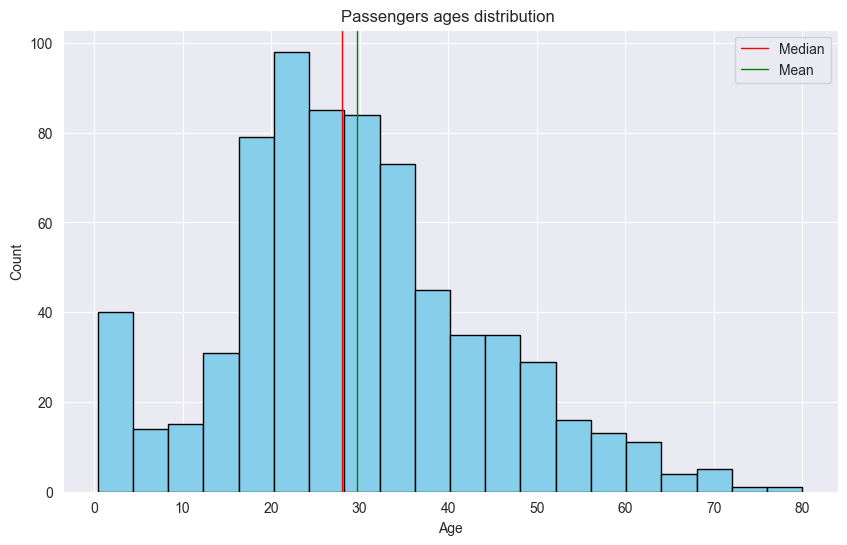

In [7]:
plt.figure(figsize=(10, 6))

# Construction of a graph of frequency distribution by age of passengers
plt.hist(titanic['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')

# Calculation and construction of the median
median_age = titanic['Age'].median()
plt.axvline(median_age, color='red',  linewidth=1, label=f'Median')

# Calculation and construction of the average value
mean_age = titanic['Age'].mean()
plt.axvline(mean_age, color='green',  linewidth=1, label=f'Mean')

plt.title('Passengers ages distribution ')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

* На гістограмі зображений розподіл віку пасажирів. Наведена медіана та середнє значення допомогають в статистичному аналізі вибірки. Я б ще додав моду та квартилі, для більш хорошого розуміння статистики

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

*питання до даних

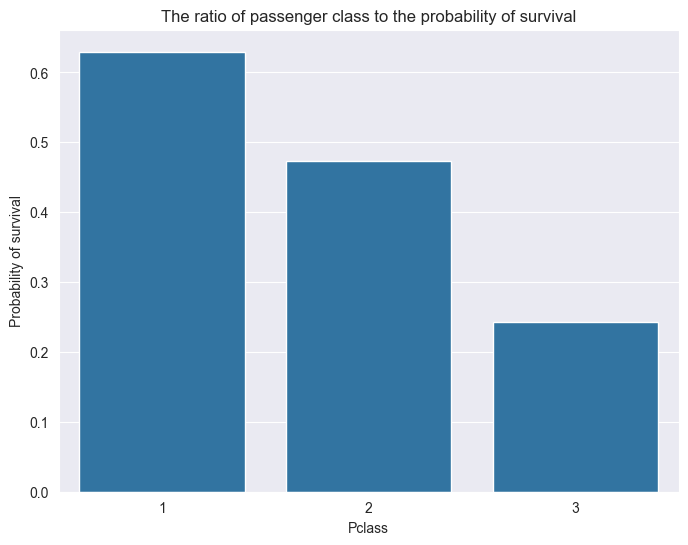

In [8]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=titanic, errorbar=None)

plt.title('The ratio of passenger class to the probability of survival')
plt.xlabel('Pclass')
plt.ylabel('Probability of survival')

plt.show()

* Бізнес-питання: Як впливає клас пасажира на ймовірність виживання? Відповідь можна представити за допомогою стовбчикової діаграми, де на осі X відображено клас пасажира, а на осі Y - ймовірність виживання. Зазвичай, пасажири першого класу мають більшу ймовірність виживання, ніж пасажири другого та третього класів.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

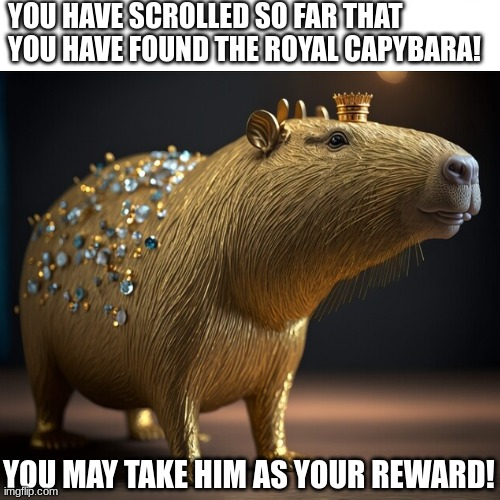